In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df=df.drop('Unnamed: 32', axis=1)

In [5]:
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]

In [6]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score

def clf_scores(clf, y_predicted):
    # Accuracy
    acc_train = clf.score(X_train, y_train)*100
    acc_test = clf.score(X_test, y_test)*100
    
    roc = roc_auc_score(y_test, y_predicted)*100 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm = confusion_matrix(y_test, y_predicted)
    correct = tp + tn
    incorrect = fp + fn
    d=[acc_train, acc_test,  roc, correct, incorrect,  cm]
    index=["acc_train",'Test Accuracy',"Roc Score","COrrect","Incorrect","Confusion"  ]
    output=pd.DataFrame(data=d, index=index)
    
    d=sns.heatmap(cm, annot=True)
    dd=plot_roc_curve(clf, X_train, y_train)
    ddd=plot_precision_recall_curve(clf, X_train, y_train)

    return output,d, dd, ddd
    

(                                 0
acc_train                38.442211
Test Accuracy            34.502924
Roc Score                     50.0
COrrect                         59
Incorrect                      112
Confusion      [[0, 112], [0, 59]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7ff10af78750>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7ff10afff550>)


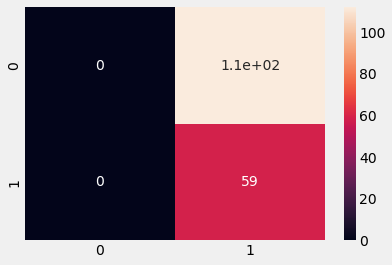

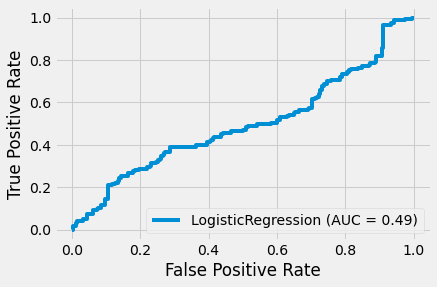

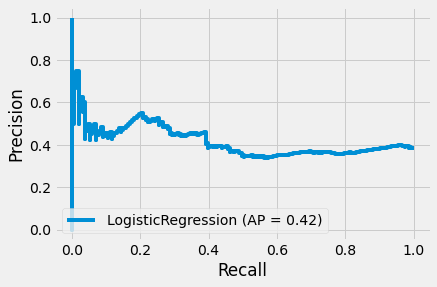

In [8]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

Y_pred_lr = clf_lr.predict(X_test)
print(clf_scores(clf_lr, Y_pred_lr))

# Threshold

In [9]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
threshold = []
accuracy = []

for p in np.unique(model.predict_proba(X_train)[:,1]):
    threshold.append(p)
    y_pred = (model.predict_proba(X_train)[:,1] >= p).astype(int)
    accuracy.append(balanced_accuracy_score(y_train,y_pred))

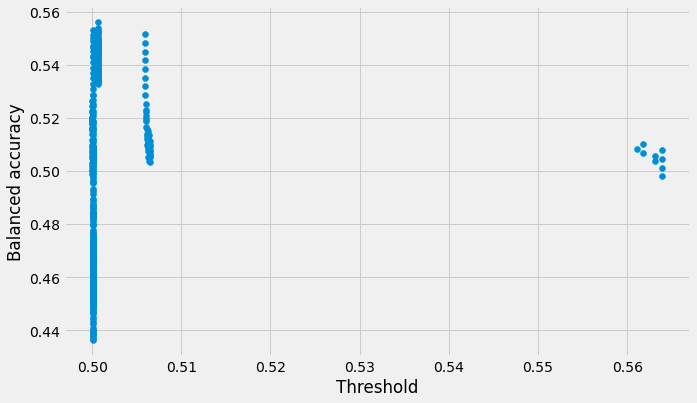

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

In [12]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [13]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

# Build Logistic Regression with Hyperparameter



In [14]:
lr = LogisticRegression()

In [15]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [18]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFai

In [19]:
best_clf.best_estimator_

LogisticRegression(C=29.763514416313132, max_iter=2500, penalty='l1',
                   solver='liblinear')

* The threshold probability should be 0.50.
* C=78.47599703514607, penalty='l1', solver='liblinear'

In [20]:
model=LogisticRegression(C=78.47599703514607, penalty='l1', solver='liblinear')

In [21]:
model.fit(X_train, y_train)

LogisticRegression(C=78.47599703514607, penalty='l1', solver='liblinear')

In [22]:
y_pred =model.predict_proba(X_train)[:,1] >= 0.5

In [23]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.9874371859296482
F1 Score:- 0.9833887043189369
Average Precision Score:- 0.9798830755082603
Log Loss:- 0.4339042260667181
Precision Score:- 1.0
Recall Score:- 0.9673202614379085
ROC-AUC Score:- 0.9836601307189543


In [24]:
y_test_pred=model.predict(X_test)>= 0.5

In [25]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.9473684210526315
F1 Score:- 0.9279999999999999
Average Precision Score:- 0.869741122194289
Log Loss:- 1.817867744641157
Precision Score:- 0.8787878787878788
Recall Score:- 0.9830508474576272
ROC-AUC Score:- 0.9558111380145279


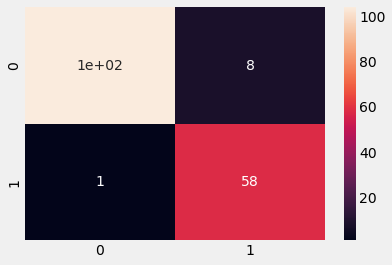

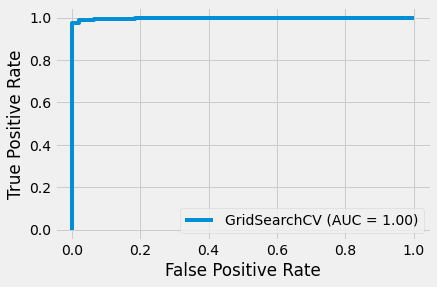

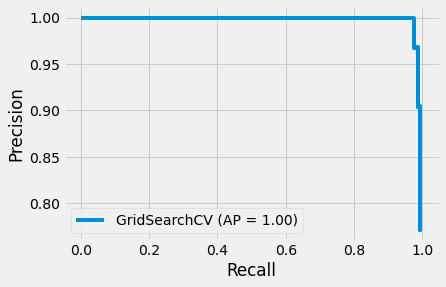

In [26]:
acc_train = model.score(X_train, y_train)*100
acc_test = model.score(X_test, y_test)*100
    
roc = roc_auc_score(y_test, y_test_pred)*100 
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
cm = confusion_matrix(y_test, y_test_pred)
correct = tp + tn
incorrect = fp + fn
d=[acc_train, acc_test,  roc, correct, incorrect,  cm]
index=["acc_train",'Test Accuracy',"Roc Score","COrrect","Incorrect","Confusion"  ]
output=pd.DataFrame(data=d, index=index)
    
sns.heatmap(cm, annot=True)
plot_roc_curve(clf, X_train, y_train)
plot_precision_recall_curve(clf, X_train, y_train)